In [14]:
from swiper2.schedule_experiments import MemorySchedule, RegularTSchedule
from swiper2.device_manager import DeviceManager
from swiper2.window_builder import WindowBuilder
from swiper2.window_manager import SlidingWindowManager
import swiper2.plot as plotter

import networkx as nx

In [5]:
def draw_dag(G):
    for layer, nodes in enumerate(nx.topological_generations(G)):
        # `multipartite_layout` expects the layer as a node attribute, so add the
        # numeric layer value as a node attribute
        for node in nodes:
            G.nodes[node]["layer"] = layer

    # Compute the multipartite_layout using the "layer" node attribute
    pos = nx.multipartite_layout(G, subset_key="layer")

    nx.draw_networkx(G, pos=pos)

# Sliding Window Scheme

## Memory Operation

In [10]:
d=7
memory_schedule = MemorySchedule(10 * d)
manager = DeviceManager(d, memory_schedule.schedule)
sliding_manager = SlidingWindowManager(WindowBuilder(d))
while not manager.is_done():
    new_round = manager.get_next_round({})
    sliding_manager.process_round(new_round)
    sliding_manager.waiting_windows = []

<Axes3D: >

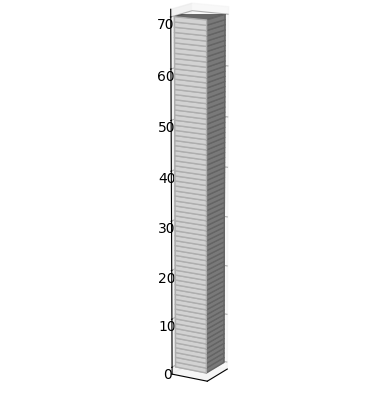

In [12]:
plotter.plot_device_schedule_trace(manager.get_data(), spacing=1)

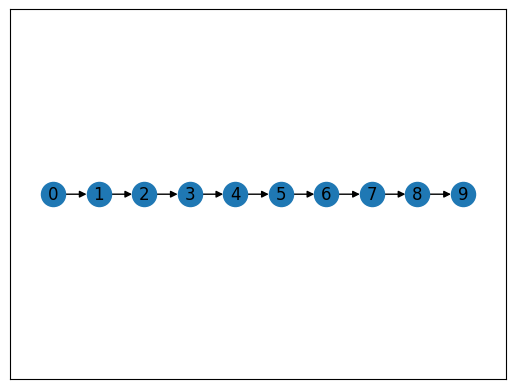

In [13]:
draw_dag(sliding_manager.window_dag)

## Regular T Schedule

#### <font color='red'>TODO: DEBUG</font>

In [16]:
d=7
memory_schedule = RegularTSchedule(10, 1)
manager = DeviceManager(d, memory_schedule.schedule)
sliding_manager = SlidingWindowManager(WindowBuilder(d))
while not manager.is_done():
    new_round = manager.get_next_round({})
    sliding_manager.process_round(new_round)
    sliding_manager.waiting_windows = []

<Axes3D: >

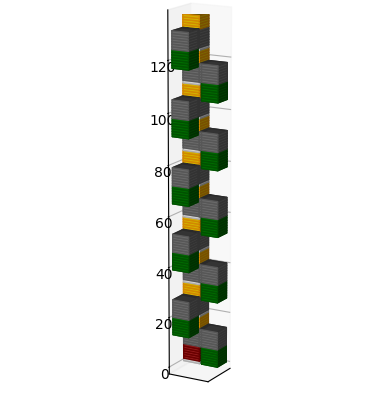

In [17]:
plotter.plot_device_schedule_trace(manager.get_data(), spacing=1)

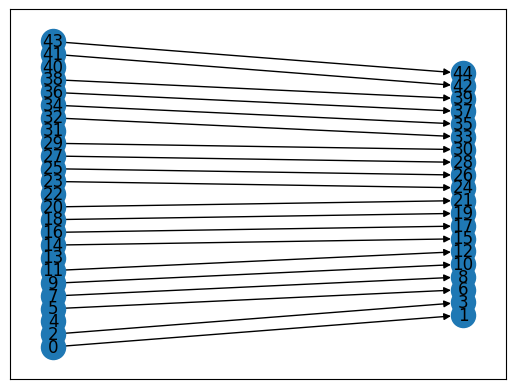

In [18]:
draw_dag(sliding_manager.window_dag)